In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
 

image = mpimg.imread("./IMG/robocam_2017_05_02_11_16_25_246.jpg")
plt.imshow(image)

(160, 320, 3)


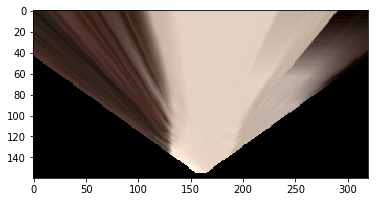

In [2]:
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    
    return warped
dst_size = 5 
bottom_offset = 6
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])
warped = perspect_transform(image, source, destination)
print(warped.shape)
plt.imshow(warped)

[[159 159]
 [159   0]
 [240   0]
 [161 159]]


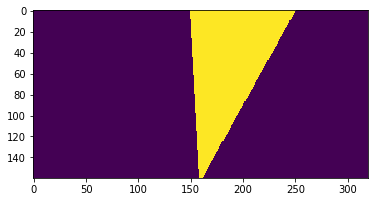

In [3]:
def mask_generator(img,polygon_pts):
    bitwise_img = np.zeros_like(img[:,:,0])
    cv2.fillPoly(bitwise_img,[polygon_pts],1)
    return bitwise_img

pts = np.array([[159,159],[150,0],[250,0],[161,159]],np.int32)
polygon_pts = np.array([[int(image.shape[1]/2-1),image.shape[0]-1],
                            [int(image.shape[1]/2-1),0],
                            [int(image.shape[1]*0.75),0],
                            [int(image.shape[1]/2+1),image.shape[0]-1]],
                            np.int32)
print(polygon_pts)
mask = mask_generator(image,pts)
plt.imshow(mask)